# Sprint 2 

# Spørgsmål 1.
## - Hvordan varierer priserne afhængigt af antallet af dage, der er tilbage før afrejse?

# Hypotesen

## - Vi antager at Prisen stiger efter, jo færre dage der er tilbage før afrejse.

## Det vil vi nu illustrere

# Importere biblioteker

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Indlæser det rensede data

In [2]:
df = pd.read_csv('../data/Clean_Dataset.csv', index_col=0)
df.sample(10)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
168231,AirAsia,I5-972,Hyderabad,Evening,one,Night,Bangalore,Economy,5.58,28,2738
85000,Air_India,AI-501,Bangalore,Afternoon,zero,Afternoon,Delhi,Economy,2.58,7,7489
202650,Vistara,UK-826,Chennai,Afternoon,one,Night,Kolkata,Economy,10.25,49,8816
106762,Indigo,6E-484,Bangalore,Early_Morning,one,Afternoon,Kolkata,Economy,6.17,30,4917
12435,Vistara,UK-933,Delhi,Afternoon,one,Night,Bangalore,Economy,7.33,14,10680
7359,SpiceJet,SG-2277,Delhi,Afternoon,one,Evening,Mumbai,Economy,25.75,37,4581
4355,GO_FIRST,G8-2609,Delhi,Night,one,Morning,Mumbai,Economy,11.83,23,5087
261283,Vistara,UK-774,Kolkata,Night,one,Morning,Delhi,Business,14.42,1,73231
131015,AirAsia,I5-588,Kolkata,Afternoon,one,Late_Night,Mumbai,Economy,11.08,24,4267
130652,AirAsia,I5-588,Kolkata,Afternoon,one,Late_Night,Mumbai,Economy,11.08,22,3379


# Plotting a scatter plot of price vs days_left

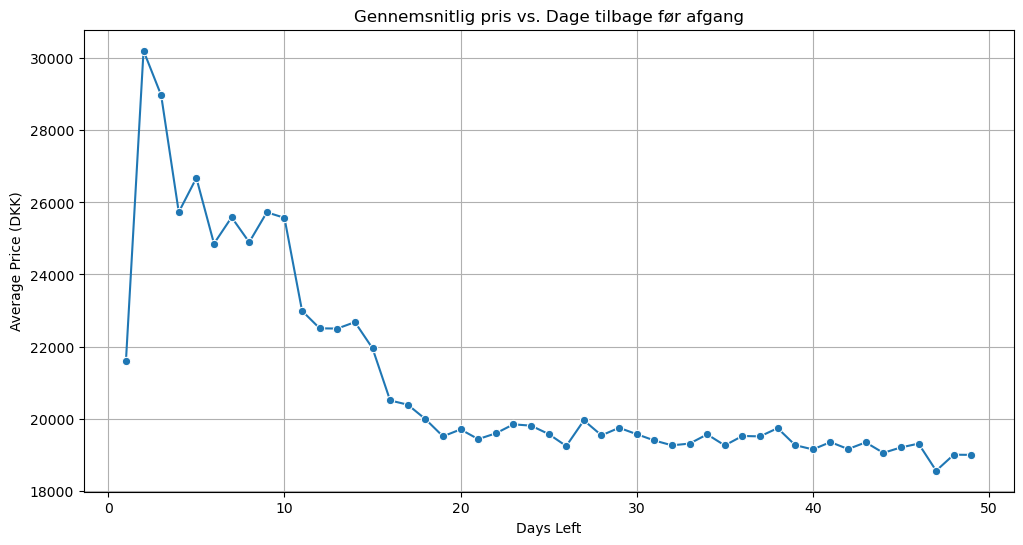

In [3]:
# Plotting a scatter plot with mean price values per days_left
plt.figure(figsize=(12, 6))

# Calculate mean price for each days_left value
mean_prices = df.groupby('days_left')['price'].mean().reset_index()

# Plot the mean values
sns.lineplot(data=mean_prices, x='days_left', y='price', marker='o')

plt.title('Gennemsnitlig pris vs. Dage tilbage før afgang')
plt.xlabel('Days Left')
plt.ylabel('Average Price (DKK)')
plt.grid(True)
plt.show()

# Definere dage intervaller

In [4]:
bins = [0, 7, 14, 21, 30, 60, 90, 180]
labels = ['0-7', '8-14', '15-21', '22-30', '31-60', '61-90', '91-180']
df['days_bin'] = pd.cut(df['days_left'], bins=bins, labels=labels)

# Plot boxplot for price distribution in each interval

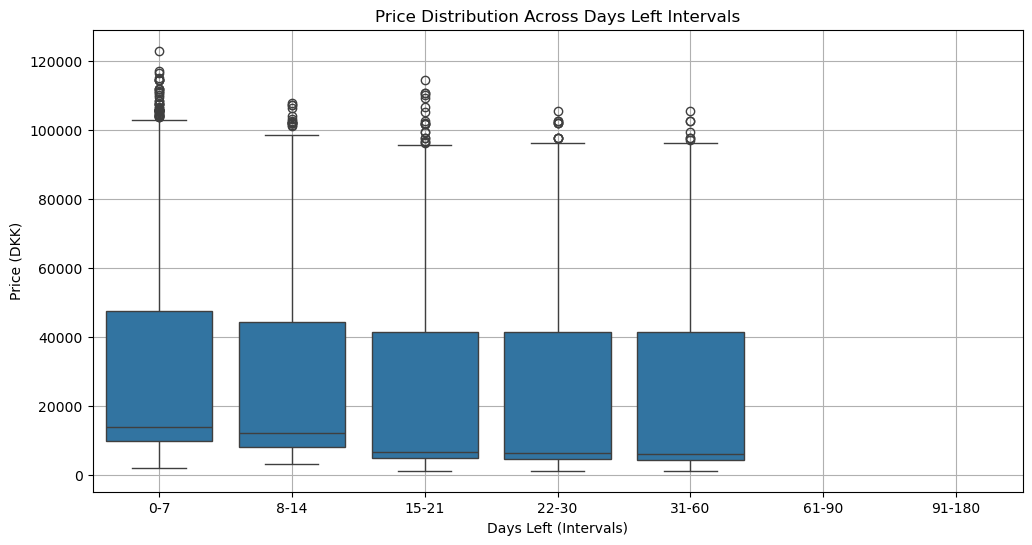

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='days_bin', y='price')
plt.title('Price Distribution Across Days Left Intervals')
plt.xlabel('Days Left (Intervals)')
plt.ylabel('Price (DKK)')
plt.grid(True)
plt.show()

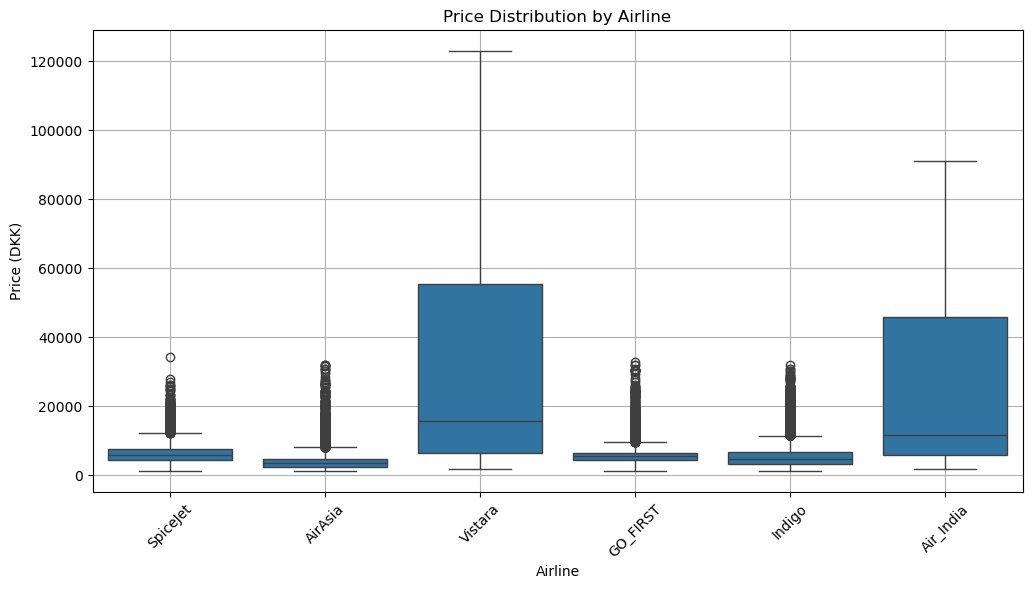

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', y='price')
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price (DKK)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

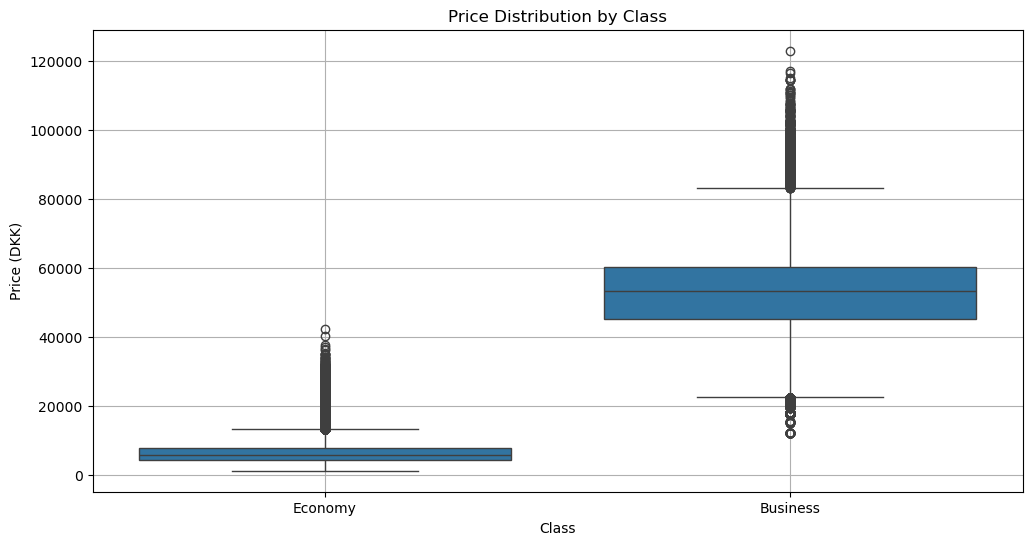

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='price')
plt.title('Price Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Price (DKK)')
plt.grid(True)
plt.show()

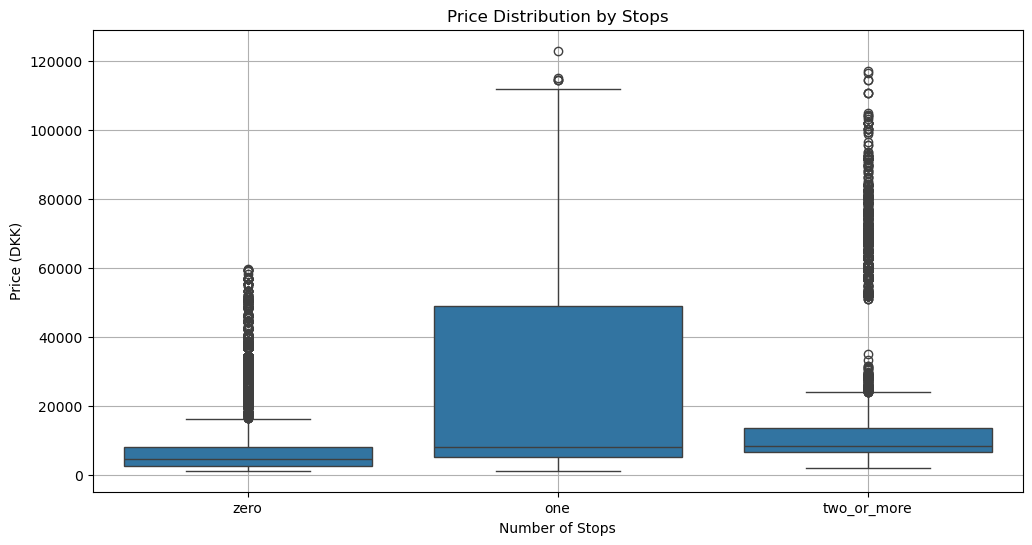

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='stops', y='price')
plt.title('Price Distribution by Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price (DKK)')
plt.grid(True)
plt.show()

# Correlation matrix for numerical variables

In [9]:
corr = df[['days_left', 'duration', 'price']].corr()

# Heatmap of correlation

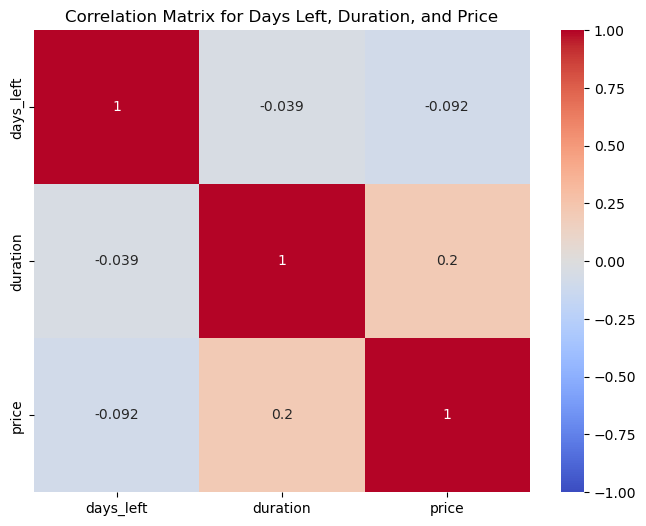

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Days Left, Duration, and Price')
plt.show()

# MODELLING & ML

# Prepare data for regression

In [11]:
X = df[['days_left', 'duration']]  # You can add more features here
y = df['price']

# Split data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Display the shapes of each dataset
print("Shapes of split datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of split datasets:
X_train shape: (240122, 2)
X_test shape: (60031, 2)
y_train shape: (240122,)
y_test shape: (60031,)


In [14]:
# Display the shapes of each dataset
print("Shapes of split datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display the percentage split
print(f"\nSplit percentages:")
print(f"Training data: {X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]):.2%}")
print(f"Testing data: {X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]):.2%}")

# Display sample data from each set
print("\nSample from X_train:")
print(X_train.head(3))

print("\nSample from X_test:")
print(X_test.head(3))

print("\nSample from y_train:")
print(y_train.head(3))

print("\nSample from y_test:")
print(y_test.head(3))

# If you're using pandas DataFrames, you can also check for data leakage
if hasattr(X_train, 'index') and hasattr(X_test, 'index'):
    common_indices = set(X_train.index).intersection(set(X_test.index))
    print(f"\nNumber of overlapping indices between train and test: {len(common_indices)}")
    # Should be 0 for a proper split

Shapes of split datasets:
X_train shape: (240122, 2)
X_test shape: (60031, 2)
y_train shape: (240122,)
y_test shape: (60031,)

Split percentages:
Training data: 80.00%
Testing data: 20.00%

Sample from X_train:
        days_left  duration
148417          6     19.42
36879          13      7.00
274531         44     21.17

Sample from X_test:
        days_left  duration
27131          40     19.75
266857         42      9.83
141228         41     10.50

Sample from y_train:
148417    13524
36879      9940
274531    55983
Name: price, dtype: int64

Sample from y_test:
27131      7366
266857    64831
141228     6195
Name: price, dtype: int64

Number of overlapping indices between train and test: 0


In [15]:
df = df[['days_left', 'price']]


# Initialize and train the model

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict and evaluate the model

In [17]:
y_pred = model.predict(X_test)

# Plot actual vs predicted prices

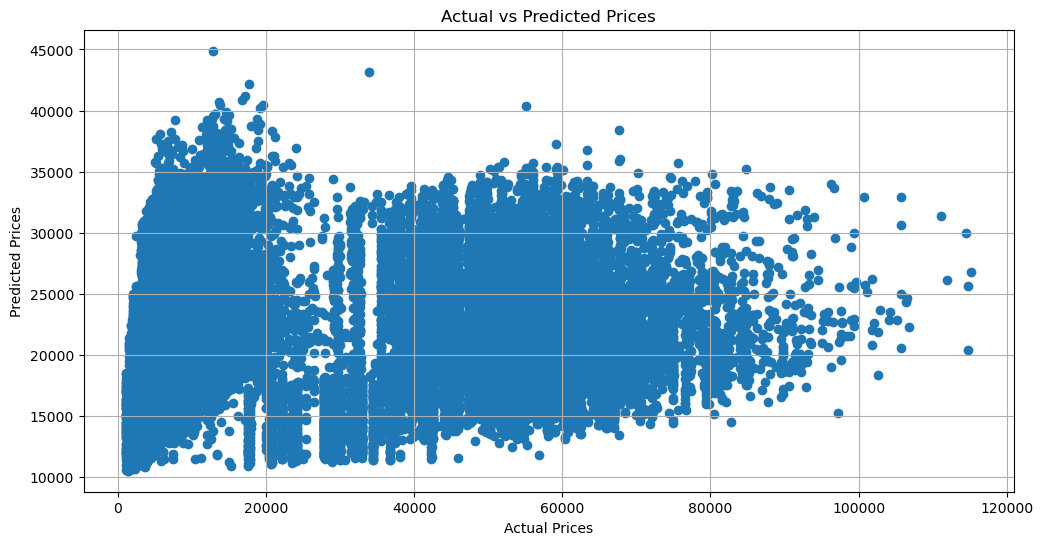

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Calculate the mean squared error

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 489490905.72141135


# One-hot encoding categorical features

In [26]:
# First, check what columns are actually in your DataFrame
print(df.columns)

Index(['days_left', 'price'], dtype='object')


In [27]:
# Then use get_dummies only on columns that exist
# For example, if your actual categorical columns are 'airline_name', 'seat_class', and 'num_stops':
df_encoded = pd.get_dummies(df, columns=['days_left', 'price'], drop_first=True)

In [28]:

# Alternatively, if you want to apply get_dummies to all object/category columns:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [29]:
print(df.columns)

Index(['days_left', 'price'], dtype='object')


# Now df_encoded contains numeric columns for all categorical variables


# Let's see the updated dataset

In [30]:
df_encoded.head(5)

,days_left,price
0,1,5953
1,1,5953
2,1,5956
3,1,5955
4,1,5955


In [31]:
# Display rows for each incremented value of days_left up to 9 days

# Get unique values of days_left in ascending order
unique_days = sorted(df_encoded['days_left'].unique())

# Filter only days less than 10
days_to_show = [day for day in unique_days if day < 5]

# For each day value, show the corresponding rows
for day in days_to_show:
    print(f"\n--- Rows where days_left = {day} ---")
    filtered_rows = df_encoded[df_encoded['days_left'] == day]
    print(filtered_rows)
    


--- Rows where days_left = 1 ---
        days_left   price
0               1    5953
1               1    5953
2               1    5956
3               1    5955
4               1    5955
...           ...     ...
261285          1   75393
261286          1   78271
261287          1   82863
261288          1   84666
261289          1  107576

[1927 rows x 2 columns]

--- Rows where days_left = 2 ---
        days_left  price
118             2   5953
119             2   5953
120             2   5955
121             2   5955
122             2   5955
...           ...    ...
298090          2  66129
298091          2  82784
298092          2  82784
298093          2  82784
298094          2  82784

[4026 rows x 2 columns]

--- Rows where days_left = 3 ---
        days_left  price
251             3   5953
252             3   5953
253             3   5953
254             3   5955
255             3   5955
...           ...    ...
298125          3  74384
298126          3  74384
298127     

# Lineær regression

In [32]:
model = LinearRegression()
X = df[['days_left']]
y = df['price']
model.fit(X, y)

LinearRegression()

# Prædiktion

In [33]:
df['predicted_price'] = model.predict(X)

# Pris variationen illustrere her, den gennemsnitlige pris 

## Line Plot af trendlinje

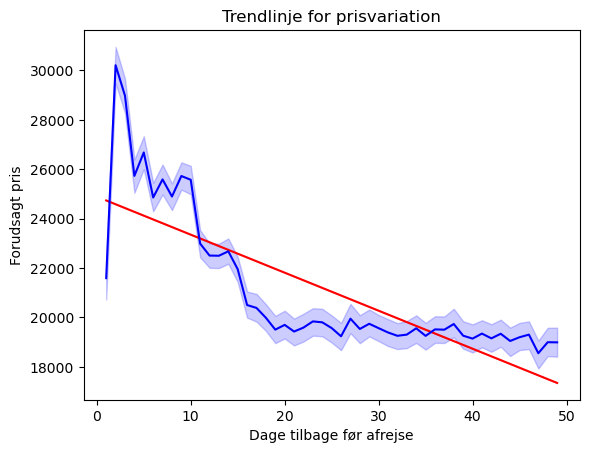

In [34]:
sns.lineplot(x=df['days_left'], y=df['predicted_price'], color="red")
sns.lineplot(x=df['days_left'], y=df['price'], color="blue")
plt.xlabel("Dage tilbage før afrejse")
plt.ylabel("Forudsagt pris")
plt.title("Trendlinje for prisvariation")
plt.show()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)